# Classification Models

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("column_2C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


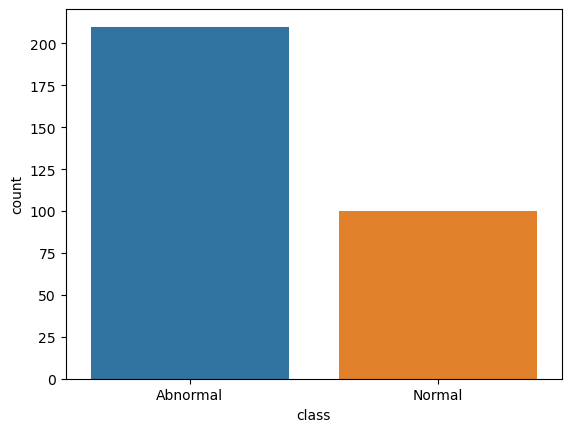

In [5]:
sns.countplot(data=data, x="class")
plt.show()

In [6]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head() # ALL numeric data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [7]:
y = data["class"].values
x_data= data.drop(["class"],axis=1)

<Figure size 400x400 with 0 Axes>

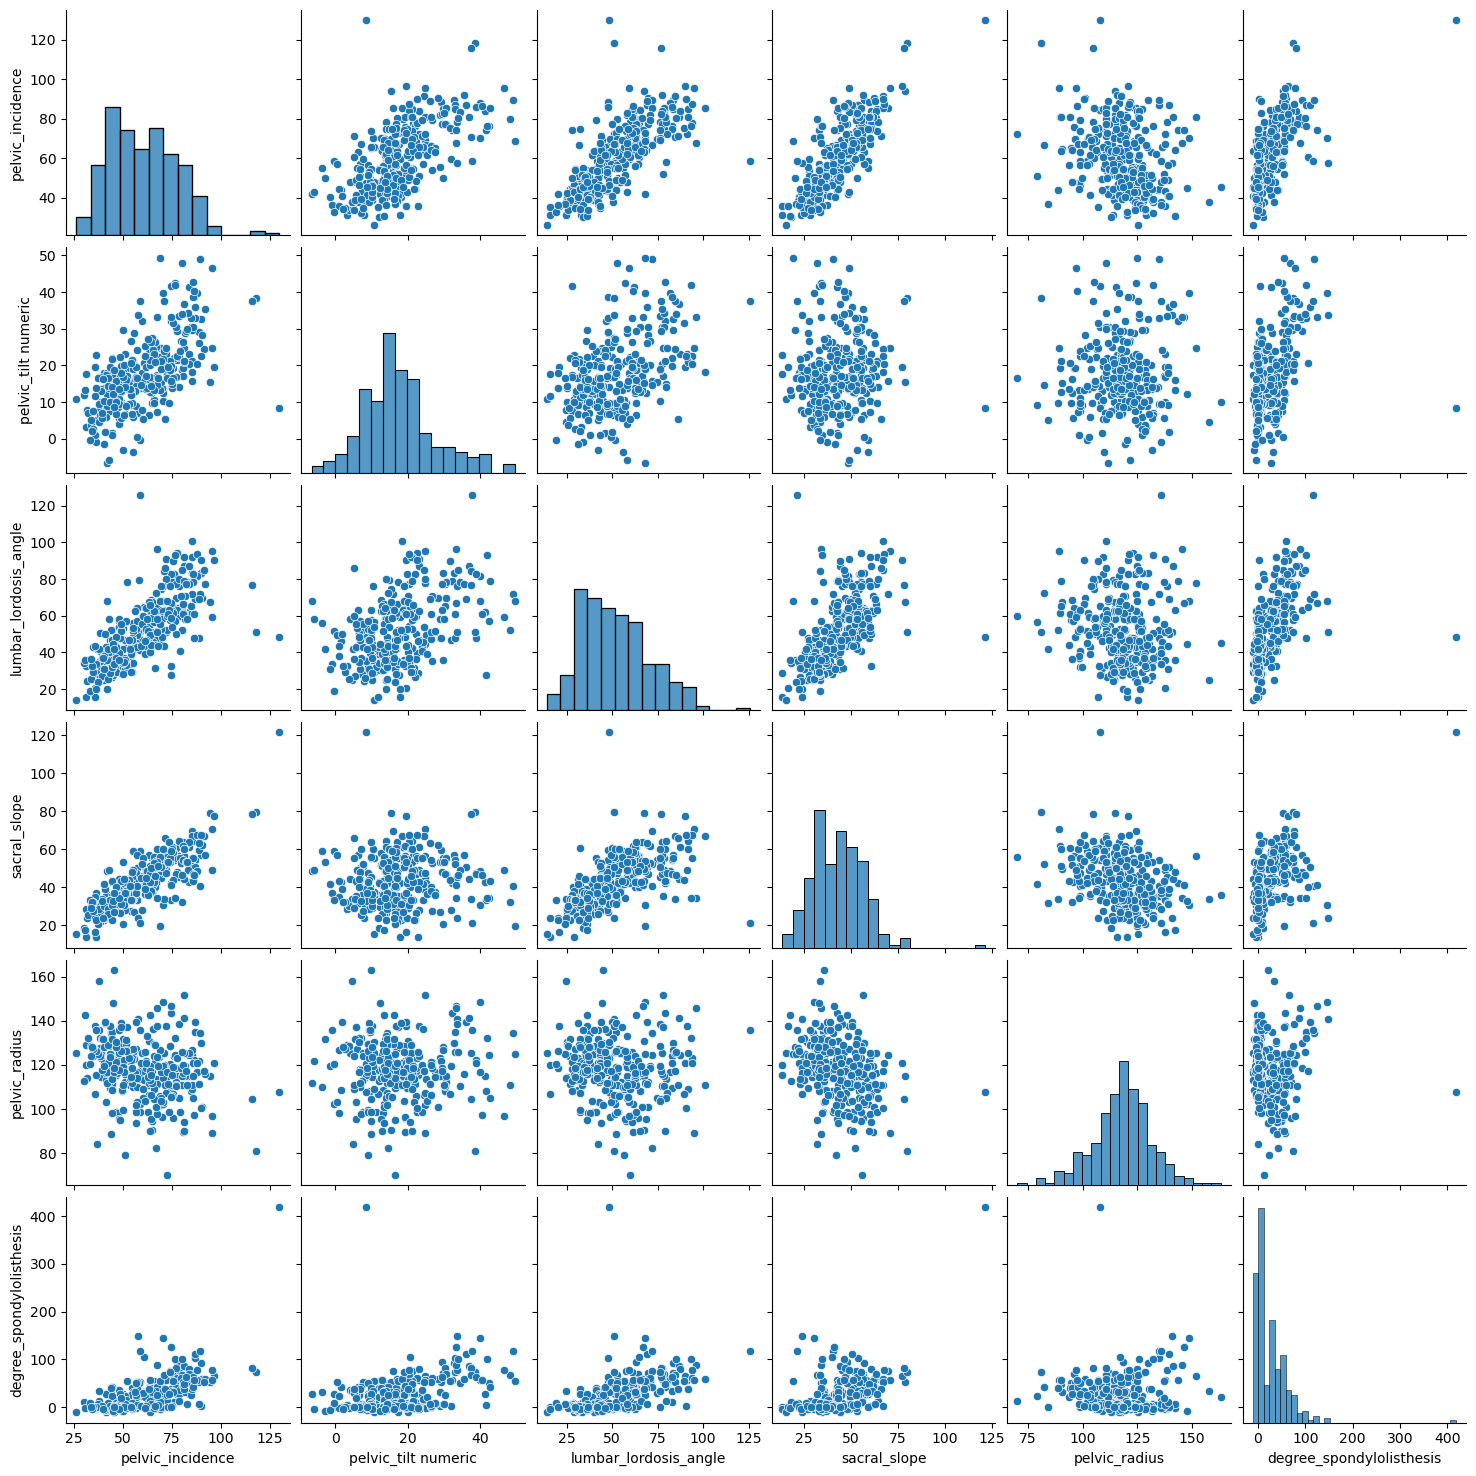

In [107]:
sns.pairplot(x_data)

In [9]:
# Normalization
x = (x_data - np.min(x_data))/(np.max(x_data)).values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# %85 for training, rest is for testing
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                   test_size=0.15,random_state=42)


In [28]:
x_train = x_train.T # transposition
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6, 263) (6, 47) (263,) (47,)


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)

LogisticRegression()

In [31]:
test_result = lr.score(x_test.T,y_test.T)
print("Test accuracy: {}".format(test_result))

Test accuracy: 0.7872340425531915


# kNN model

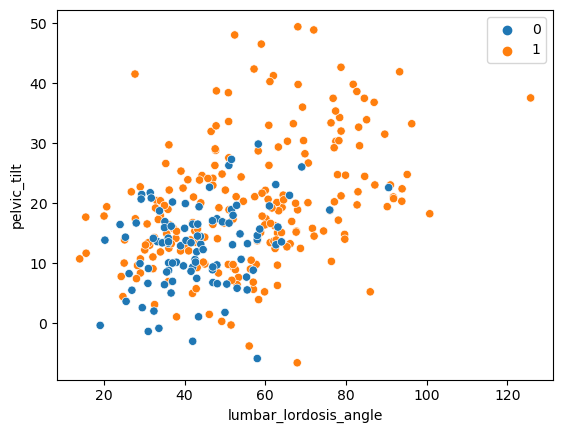

In [32]:
sns.scatterplot(data=data, x="lumbar_lordosis_angle", 
                y= "pelvic_tilt numeric", hue="class")
plt.xlabel("lumbar_lordosis_angle")
plt.ylabel("pelvic_tilt")
plt.legend()
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_num = 15
knn = KNeighborsClassifier(n_neighbors = neighbor_num)
knn.fit(x_train.T,y_train.T)

prediction = knn.predict(x_test.T)
print("{} kNN accuracy: {}".format(neighbor_num,knn.score(x_test.T,y_test.T)))


15 kNN accuracy: 0.851063829787234


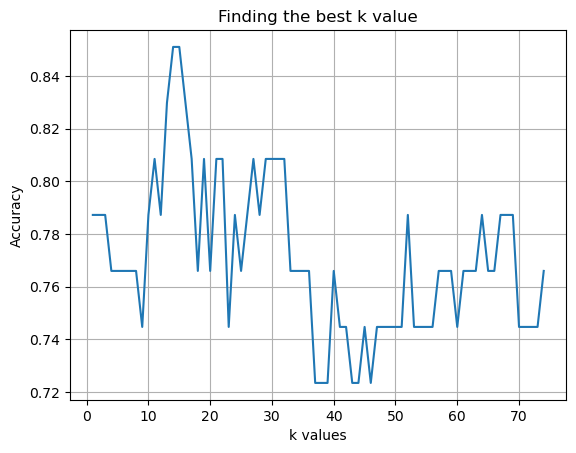

In [34]:
score_list = []
for each in range(1,75):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train.T,y_train.T)
    score_list.append(knn2.score(x_test.T,y_test.T))
    
plt.plot(range(1,75),score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Finding the best k value")
plt.grid(True)
plt.show()

## Support Vector Machines

In [35]:
print(x_train.shape)  
print(y_train.shape)  

(6, 263)
(263,)


In [38]:
from sklearn.svm import SVC

svm = SVC(random_state= 1)
svm.fit(x_train.T,y_train.T)

print("SVM accuracy: {}".format(svm.score(x_test.T,y_test.T)))

SVM accuracy: 0.851063829787234


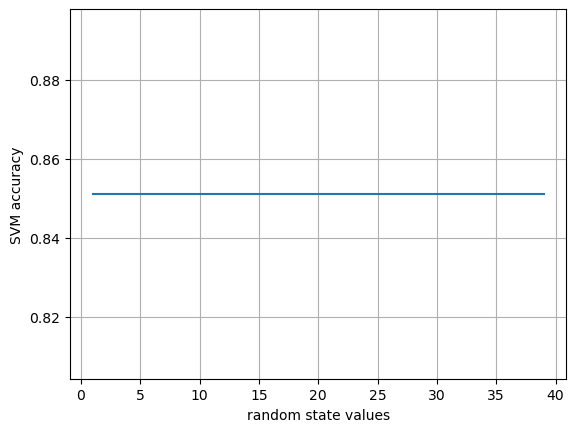

In [39]:
random_state_list = []

for each in range(1,40):
    svm2 = SVC(random_state = each)
    svm2.fit(x_train.T,y_train.T)
    random_state_list.append(svm2.score(x_test.T,y_test.T))
    
plt.plot(range(1,40),random_state_list)
plt.xlabel("random state values")
plt.ylabel("SVM accuracy")
plt.grid(True)
plt.show()

# Desicion Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
accuracy_list = []
for i in range(2,10):
    dt = DecisionTreeClassifier(criterion='gini',splitter='random',
                            min_samples_split= i, max_depth=6,
                            min_samples_leaf=3)
    dt.fit(x_train.T,y_train.T)
    accuracy_list.append(dt.score(x_test.T,y_test.T))

In [62]:
accuracy_list # for min_samples_split = 6, accuracy is the best!

[0.723404255319149,
 0.8085106382978723,
 0.7021276595744681,
 0.8723404255319149,
 0.8936170212765957,
 0.8297872340425532,
 0.8085106382978723,
 0.723404255319149]

In [63]:
new_accuracy_list = []
for i in range(2,10):
    dt = DecisionTreeClassifier(criterion='gini',splitter='random',
                            min_samples_split= 6, max_depth= i,
                            min_samples_leaf=3)
    dt.fit(x_train.T,y_train.T)
    new_accuracy_list.append(dt.score(x_test.T,y_test.T))

In [64]:
new_accuracy_list # for max_depth = 8, accuracy is the best!

[0.7872340425531915,
 0.6170212765957447,
 0.7446808510638298,
 0.7872340425531915,
 0.7659574468085106,
 0.7021276595744681,
 0.8723404255319149,
 0.7872340425531915]

In [65]:
last_acc_list = []
for i in range(2,10):
    dt = DecisionTreeClassifier(criterion='gini',splitter='random',
                            min_samples_split = 6, max_depth= 8,
                            min_samples_leaf = i)
    dt.fit(x_train.T,y_train.T)
    last_acc_list.append(dt.score(x_test.T,y_test.T))

In [66]:
last_acc_list # for min_samples_leaf = 7, accuracy is the best!

[0.723404255319149,
 0.7659574468085106,
 0.8085106382978723,
 0.7872340425531915,
 0.8085106382978723,
 0.851063829787234,
 0.8085106382978723,
 0.8297872340425532]

In [73]:
dt = DecisionTreeClassifier(criterion='gini',splitter='random',
                            min_samples_split=7, max_depth=6,
                            min_samples_leaf=6)
dt.fit(x_train.T,y_train.T)

print("Decision Tree Accuracy: {}".format(dt.score(x_test.T,y_test.T)))

Decision Tree Accuracy: 0.851063829787234


# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators =100,random_state=1)
rf.fit(x_train.T,y_train.T)

print("Random forest accuracy: {}".format(rf.score(x_test.T,y_test.T)))

Random forest accuracy: 0.851063829787234


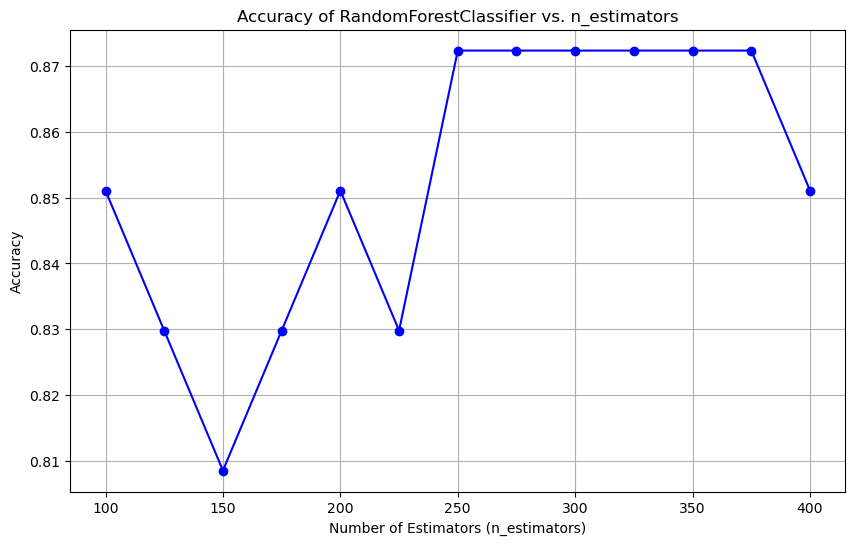

In [80]:
# Define the range of n_estimators values
n_estimators_range = np.arange(100, 401, 25)
accuracies = []

# Loop through each n_estimators value, train the model, and calculate accuracy
for n in n_estimators_range:
    # Create a RandomForestClassifier with the current number of estimators
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    
    # Train the model
    rf.fit(x_train.T, y_train.T)
    
    # Make predictions on the test set
    y_pred = rf.predict(x_test.T)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test.T, y_pred.T)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of RandomForestClassifier vs. n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# XGBClassifier

In [86]:
from xgboost import XGBClassifier

In [87]:
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.25]
n_estimators = [100, 200]

In [88]:
acc_list_XCBC = []
for i in range(len(learning_rates)):
    for k in range(len(n_estimators)):
        XCBC = XGBClassifier(n_estimators=n_estimators[k], 
                             learning_rate=learning_rates[i])

        XCBC.fit(x_train.T,y_train.T)
        acc_list_XCBC.append(XCBC.score(x_test.T,y_test.T))  

In [89]:
acc_list_XCBC

[0.8085106382978723,
 0.8723404255319149,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.8297872340425532,
 0.851063829787234,
 0.851063829787234,
 0.8723404255319149]

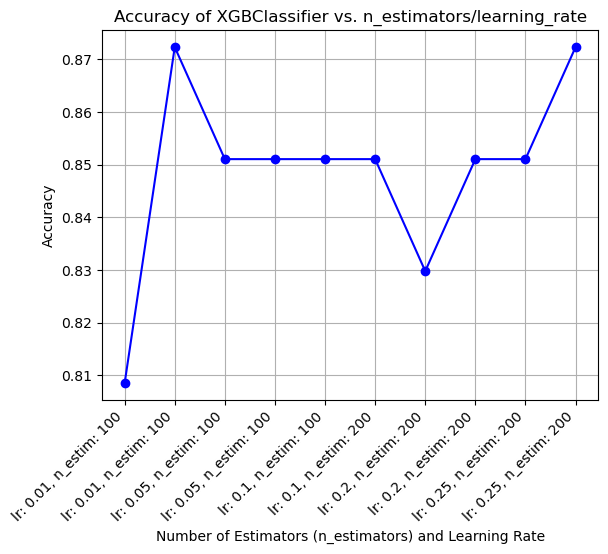

In [93]:
plt.figure()
x_labels = ["lr: 0.01, n_estim: 100", "lr: 0.01, n_estim: 100",
            "lr: 0.05, n_estim: 100", "lr: 0.05, n_estim: 100",
            "lr: 0.1, n_estim: 100", "lr: 0.1, n_estim: 200",
            "lr: 0.2, n_estim: 200", "lr: 0.2, n_estim: 200",
            "lr: 0.25, n_estim: 200", "lr: 0.25, n_estim: 200"]

# Plot against numeric indices, but we'll replace the x-tick labels.
plt.plot(range(len(x_labels)), acc_list_XCBC, marker='o', 
         linestyle='-', color='b')

# Set the x-tick labels to the parameter combinations
plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha="right")

plt.title('Accuracy of XGBClassifier vs. n_estimators/learning_rate')
plt.xlabel('Number of Estimators (n_estimators) and Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# MLPClassifier

In [94]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(hidden_layer_sizes=(100,))

MLPC.fit(x_train.T,y_train.T)
print("Neural Networks accuracy: {}".format(MLPC.score(x_test.T,y_test.T)))

Neural Networks accuracy: 0.7872340425531915


# GaussianNB (Naive Bayes)

In [97]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb = GaussianNB(var_smoothing=1e-8, priors=None)
gnb.fit(x_train.T, y_train.T)

accuracy = accuracy_score(y_test.T, y_pred.T)
print(f"Accuracy: {accuracy}")

Accuracy: 0.851063829787234


# AdaBoost Classifier

In [98]:
from sklearn.ensemble import AdaBoostClassifier
acc_list = []

for i in range(50,501,25):
    Ada_Clf = AdaBoostClassifier(n_estimators = i)
    Ada_Clf.fit(x_train.T, y_train.T)
    accuracy = accuracy_score(y_test.T, y_pred.T)
    acc_list.append(accuracy)

In [99]:
acc_list # for all different estimator numbers, accuracy is the same!

[0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234,
 0.851063829787234]

# Confusion Matrix for Ada_Clf

In [102]:
from sklearn.metrics import confusion_matrix
y_pred = Ada_Clf.predict(x_test.T)
cm = confusion_matrix(y_test.T,y_pred.T)
cm

array([[ 9,  3],
       [ 5, 30]], dtype=int64)

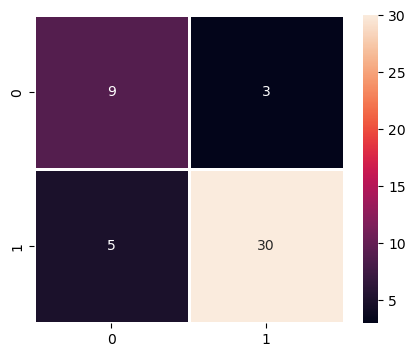

In [110]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,linewidth=1,linecolor="white",fmt=".0f")
plt.show()

# Confusion Matrix for Random Forest

In [104]:
y_pred = rf.predict(x_test.T)
cm2 = confusion_matrix(y_test.T,y_pred.T)
cm2

array([[10,  2],
       [ 5, 30]], dtype=int64)

<Axes: >

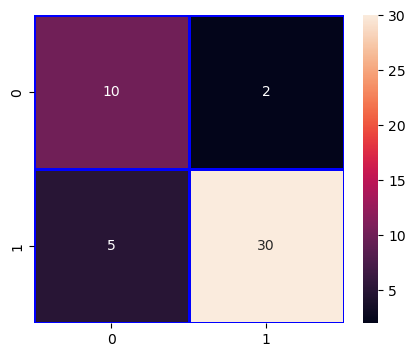

In [111]:
plt.figure(figsize=(5,4))
sns.heatmap(cm2,annot=True,linewidth=1,linecolor="blue",fmt=".0f")